In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


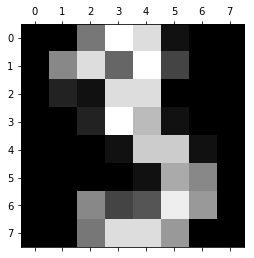

In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[3]) 
plt.show() 

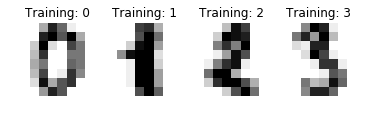

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
plt.show()

In [6]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=1)
model = LogisticRegression(solver = 'lbfgs')
#X_train.shape, y_train.shape
model.fit(X_train, y_train)

# get test results
y_predicted = model.predict(X_test)


# print confusion matrix
confusion = confusion_matrix(y_test, y_predicted)
print('Confusion matrix')
print(confusion)

Confusion matrix
[[42  0  0  0  1  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 29  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  1  0  0 27  1]
 [ 0  0  0  0  0  1  0  0  1 32]]


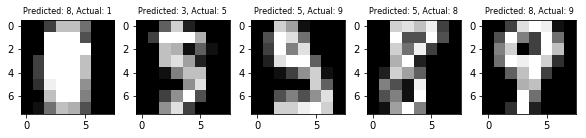

In [27]:
import numpy as np

# Display misclassified images
def get_misclassified(predicted, test):
    idx = 0
    for predicted_val, true_val in zip(predicted, test):
        if predicted_val != true_val:
            yield idx
        idx += 1
        
index = 0

plt.figure(figsize=(10,10))
#for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
for plotIndex, wrong in enumerate(get_misclassified(y_predicted, y_test)):
    if plotIndex > 4: break
    plt.subplot(5, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_predicted[wrong], y_test[wrong]), fontsize = 8)
plt.show()